<a href="https://colab.research.google.com/github/keywoong/deeplearning_with_python/blob/main/2_the_mathematical_building_blocks_of_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `A first look at a neural network`
#### MNIST : Classifying handwritten digits (28x28 픽셀 크기의 이미지, 0에서 9 까지의 카테고리가 존재한다.)
#### `classes` 분류 문제에서 다루는 카테고리들
#### `label`  특정 샘플이 가지는 카테고리를 말함. 정답과 비슷한 개념

In [ ]:
# Loading the MNIST dataset in keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### train_images, train_labels는 training set을 구성하고, test_images, test_labels는 test set을 구성한다.
#### `image` 값은 행렬로 이루어져있고, `label`값은 0부터 9사이의 스칼라 값으로 이루어져있다.

In [ ]:
# The Network Architecture
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

#### layer을 통해 더 쓸모 있는 형태의 데이터(meaningful representations)로 가공됨
#### 아래의  model은 2개의 층으로 구성됨. 
#### softmax layer : 10개의 데이터를 원핫코딩으로 표현

#### 네트워크를 학습시키기 전에 크게 3가지가 필요함.
#### `손실 함수`  able to steer itself in the right direction
#### `optimizer`  데이터를 기반으로 하여 업데이트 하는 메커니즘 (rmsprop, adams etc...)
#### ` Metrics to monitor during training and testing` : accuracy

In [ ]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### 이제 네트워크 설계는 끝났고, 이제 mnist로부터 가져온 데이터들을 가공하기 쉽게 reshape해준다.
#### 원래 데이터의 shape은 `(60000, 28, 28)`이었고, `int`형의 데이터타입을 가졌다. 이제 이를 `float` 타입으로 변형하고 `(60000,28*28)`형태로 만들어 0과 1 사이의 값으로 만들어준다.

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

#### image를 [0과 1] 사이의 값으로 만들어 주었다면, label값을 카테고리로 encoding하여준다.

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs = 5, batch_size = 128)
# epoch : 입력 데이터를 한바퀴 돌려 학습시키는 주기
# batch_size : 가중치 값을 업데이트하는 주기
test_loss, test_acc = network.evaluate(test_images,test_labels)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2602 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1045 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0694 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9767


#### `loss of the network` , `accuracy` 2개의 데이터가 training하는 동안 표시되었다.
#### 결과론적으로 정확도는 약 97%가 나왔다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc :', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9767
test_acc : 0.9767000079154968


# `Data Representations for neural network`
## 2.2.1 scalar (0D tensors)
#### x = np.array(12) // x.dim = 0
## 2.2.2 Vectors (1D tensors)
#### x = np.array([1,2,3,4,5]) // x.dim = 1
## 2.2.3 Matrices (2D tensors)
#### x = np.array([[1,2,3,4], [9,8,7,6]]) // x.dim = 2
## 2.2.4 3D tensors
#### x = np.array([ [[1,2],[4,5]] , [[11,12],[14,15]] , [[23,24],[26,27]] ]) // x.dim = 3
## 2.2.5 Key attributes
#### `axes(dimension)` ndim이라고도 부른다. 행렬의 차원을 뜻함
#### `Shape` 얼마나 많은 텐서가 각각의 axis에 존재하는지를 말함. 
#### `Data Type` float32, unit8, float64

In [ ]:
import numpy as np
x = np.array([ [[1,2],[4,5]] , [[11,12],[14,15]] , [[23,24],[26,27]] ])
print(x.ndim)

3


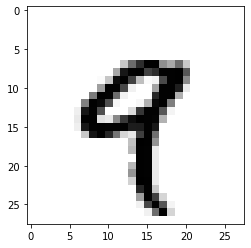

In [ ]:
# Displaying the fourth digit
train_images = train_images.reshape((60000,28,28))
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

## 2.2.6 Manipulating tensors in Numy
#### 위의 소스코드에서 train_images[i]를 이용해 특정 digit을 선택하였는데, 이를 tensor slicing 이라고 한다.

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)
# 10부터 100까지 총 90개, 28x28데이터

(90, 28, 28)


#### `:` 은 전체 axis에서 데이터를 고르는 것과 동일하다.

In [ ]:
my_slice = train_images[10:100, :,:]
print(my_slice.shape)
my_slice = train_images[10:100, 0:27, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 27, 28)


#### 우하향 방향의 14x14 형태의 픽셀을 고르기 위해서는 아래와 같이 설계한다.

In [ ]:
# bottom right corner
my_slice = train_images[:,14:,14:]
print(my_slice.shape)

(60000, 14, 14)


#### 음수를 사용하는 것도 가능하다. 정가운데의 14x14 크기의 픽셀을 고르기 위해서는 아래와 같이 설계한다.

In [ ]:
# centered in the middle
my_slice = train_images[:,7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


## 2.2.7 The Notion of data batches
#### 딥러닝에서는 모든 데이터 셋을 한꺼번에 처리하지 않는다. 데이터셋을 batch_size로 나누어서 학습한다.

In [ ]:
batch = train_images[:128]
second_batch = train_images[128:256]

## 2.2.8 Real-world examples of data tensors
#### 이번에는 데이터 텐서를 보다 더 구체적으로 만들어 볼것이다. 다루게 될 데이터는 아래의 카테고리 중 하나이다. 
#### `Vector data` : 2차원 형태 데이터, (samples, features)
#### `Sequence data` : 3차원 형태 데이터, (samples, timesteps, features)
#### `Images` : 4차원 형태 데이터, (Samples, height, width, channels)
#### `Video` : 5차원 형태 데이터, (samples, frames, height, width, channels) / Video는 여러 frame의 images가 합쳐진 형태이기 때문이다.

## 2.2.9 Vector Data
#### 만약 6000명의 사람들의 이름, 나이, 전화번호 데이터를 다룬다면 이는 2차원 데이털 표현된다. (6000,3)
## 2.2.10 Timeseries data or sequence data
#### 만약 데이터에 시간의 흐름이 중요하다면, 이는 3차원 데이터로 표현된다. 
#### 주식 데이터셋을 다룰 때, 우리는 현재 주식가격, 과거 최고 주식가격, 과거 최저 주식가격을 데이터에 저장한다. 따라서 trading하는 날의 데이터는 2차원 데이터이다. (390, 3) 그리고 250일 동안의 데이터는 3차원 데이터로 표현된다. (250,390,3)
## 2.2.11 Image data


# `The gears of neural networks : tensor operations`
## 2.3.1 Element-wise operations
#### `relu` 함수는 element-wise operation이다. : 대규모 병렬 계산에 적합

In [ ]:
# relu operation using for loop
def naive_relu(x):
    assert len(x.shape)==2
    # x는 2차원 형태의 데이터
    x = x.copy()
    for i in range(x.shape[0]):
        # i를 x의 샘플 개수만큼 돌림
        for j in range(x.shape[1]):
            # j를 x의 특징 개수만큼 돌림
            x[i,j] = max(x[i,j],0)
            # relu함수의 특징
    return x

In [ ]:
# relu operation using numpy package
import numpy as np
x=2
y=3
z = x + y
z = np.maximum(z,0)

## 2.3.2 Broadcasting
#### broadcasting은 2가지의 단계가 있다. 
#### 1. axes는 더 큰 텐서의 차원으로 맞추기 위해 더 작은 텐서에 더해진다.
#### 2. 더 작은 텐서는 더 큰 텐서의 shape에 맞춰질 때까지 새로운 axes가 더해진다.
#### 예를 들어, X의 shape은 `(32, 10)`이고, Y의 shape은 `(10, )`라고 하자. 
#### 우선, Y의 첫번째 axis를 더해준다. `Y.shape = (1, 10)`
#### 그 다음, 32번 첫 번째 axis에 값을 더해서 `(32, 10)`이 되도록 만들어 준다.

In [ ]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2 # X는 2차원 형태 벡터
    assert len(y.shape) == 1 # Y는 1차원 형태 벡터
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        # i를 x의 샘플 수 만큼 돌림
        for j in range(x.shape[1]):
            # j를 x의 특징 수 만큼 돌림
            x[i, j] += y[j]
    return x

#### broadcasting을 통해 2개의 텐서의 element-wise operation 계산을 할 수 있다.

In [ ]:
x = np.random.random((64,3,32,10))
y = np.random.random((3,32,10))

z = np.maximum(x,y)
print(x[:1,:,:1,:])
print('---------------')
print(y[:1,:])
print('---------------')
print(z[:1,:,:1,:])
print(z.shape)

[[[[0.562855   0.57206781 0.56640721 0.35294273 0.06601951 0.43497165
    0.05362054 0.02374742 0.92665182 0.45971163]]

  [[0.05488972 0.12155254 0.41932527 0.47633045 0.31800309 0.63381093
    0.32097649 0.11001226 0.22008025 0.30868205]]

  [[0.38406289 0.20651002 0.65931696 0.84077421 0.74434877 0.86814058
    0.68475732 0.76688944 0.23800202 0.73874819]]]]
---------------
[[[0.25082246 0.97745555 0.23616395 0.56169601 0.43678835 0.20127925
   0.56741759 0.38468008 0.58314264 0.77598246]
  [0.43206989 0.13502028 0.34758412 0.78660162 0.22885451 0.12724534
   0.47114295 0.94275772 0.31509218 0.63905213]
  [0.83088582 0.4808728  0.33199308 0.06062392 0.27275802 0.14581779
   0.73425365 0.82108617 0.31646311 0.98917101]
  [0.65191703 0.69546862 0.59067434 0.88279973 0.93570431 0.04207631
   0.61569056 0.1085266  0.64980287 0.37108406]
  [0.34575728 0.95821453 0.65489158 0.97481053 0.68508209 0.06689778
   0.05483815 0.35930061 0.65335523 0.54131022]
  [0.831979   0.71214415 0.5182497 

## 2.3.3 Tensor dot
#### dot operation은 가장 흔하고, 강력한 tensor 연산이다. 

## 2.3.4 Tensor reshaping

In [ ]:
import numpy as np
x = np.array([[0,1],[2,3],[4,5]])
print(x.shape)
print('------------------')
x = x.reshape(6,1)
print(x)
print('------------------')
x = x.reshape((2,3))
print(x)
print('------------------')
x = np.zeros((300,200))
x = np.transpose(x)
print(x.shape)

(3, 2)
------------------
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
------------------
[[0 1 2]
 [3 4 5]]
------------------
(200, 300)


## 2.3.5 Geometric interpretation of tensor operations
## 2.3.6 A geometric interpretatino of deep learning

# `The engine of neural networks : grdient-based optimization`
## 2.4.1 What's a derivative?
## 2.4.2 Derivative of a tensor opreation : the gradient
## 2.4.3 Stochastic gradient descent
#### 1. x값과 그에 대응하는 y값을 training set로 만든다.
#### 2. network에 x값을 넣고 출력값을 얻는다.
#### 3. 예측값과 실제값의 차이인 손실값을 얻는다.
#### 4. 매개변수에 대한 손실함수의 미분값을 얻는다.
#### 5. 매개변수의 값을 조금씩 움직여준다.
#### 극소로 빠지게 되는 문제점 발생 : `momentum`을 이용
#### momentum을 생각할 때는 optimization하는 과정을 작은 공이 손실함수를 굴러간다고 파악.
#### 각 단계를 거칠때마다 경사면의 기울기 뿐만 아니라 공이 굴러가는 속도또한 학습하는데 영향을 준다.

In [ ]:
'''past_velocity = 0.
momentum = 0.1
while loss>0.01:
    w,loss, gradient = get_current_parameters
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
'''

'past_velocity = 0.\nmomentum = 0.1\nwhile loss>0.01:\n    w,loss, gradient = get_current_parameters\n    velocity = past_velocity * momentum + learning_rate * gradient\n    w = w + momentum * velocity - learning_rate * gradient\n    past_velocity = velocity\n    update_parameter(w)\n'

## 2.4.4 Chaining derivatives : the Backpropagation algorithm